In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
import matplotlib.gridspec as gridspec
import sys

import corner
import time
import pickle
import acor
import copy

import binary_c
import xrb
from xrb.binary import binary_evolve
from xrb.binary.binary_evolve import A_to_P
from xrb.src import stats
from xrb.SF_history import sf_history

from xrb.src.core import *
set_data_path("../data")

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [47]:
# sampler_MCMC = pickle.load(open("../data/SMC_sampler.obj", "rb"))
# data_MCMC = sampler_MCMC.flatchain

data_MCMC = np.load("../data/SMC_chains.npy")
data_MCMC = data_MCMC.reshape(4000, 10)

data_forward = np.load("../data/SMC_forward.npy")

In [48]:
print data_MCMC.shape
print data_forward.shape

(4000, 10)
(5097, 11)


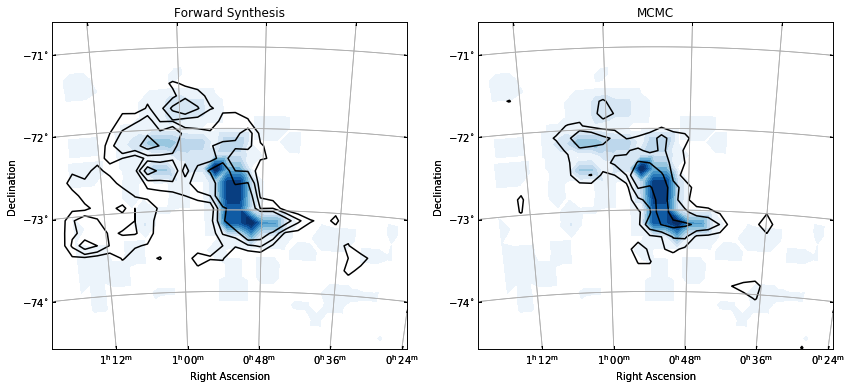

In [58]:
c.sf_scheme = "SMC"

fig = plt.figure(figsize=(14,6))


gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])


# Forward synthesis
sf_history.get_plot_polar(30, fig_in=fig, gs=gs[0], ra_dist=data_forward.T[7], dec_dist=data_forward.T[8], 
                          dist_bins=30, xwidth=2.0, ywidth=2.0, xgrid_density=6, title='Forward Synthesis')


# Backward synthesis
sf_history.get_plot_polar(30, fig_in=fig, gs=gs[1], ra_dist=data_MCMC.T[7], dec_dist=data_MCMC.T[8],
                          dist_bins=30, xwidth=2.0, ywidth=2.0, xgrid_density=6, title='MCMC')


# plt.savefig("../figures/SMC_MCMC_vs_forward_maps.pdf")
plt.show()

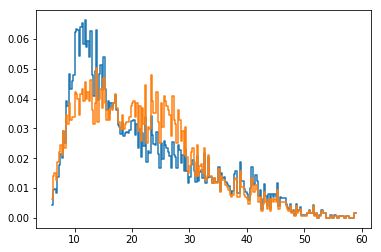

In [50]:
t_min = np.min(data_forward.T[9])
t_max = np.max(data_forward.T[9])
n_bins = int((t_max - t_min) / 0.25 +1)
bins = np.linspace(t_min, t_max, n_bins)


hist, edges = np.histogram(data_forward.T[9], bins=bins, weights=data_forward.T[10], normed=True)

left,right = edges[:-1],edges[1:]
X = np.array([left,right]).T.flatten()
Y = np.array([hist,hist]).T.flatten()

plt.plot(X,Y)


hist, edges = np.histogram(data_forward.T[9], bins=bins, normed=True)
Y = np.array([hist,hist]).T.flatten()

plt.plot(X,Y)



plt.show()

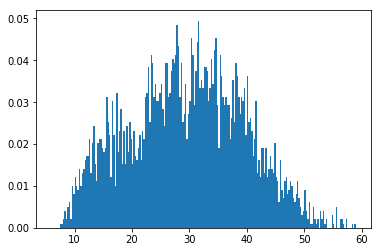

In [51]:
plt.hist(data_MCMC.T[9], bins=bins, normed=True)

plt.show()

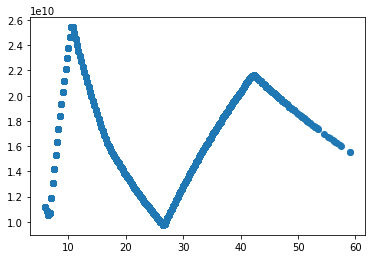

In [14]:
plt.scatter(data_forward.T[9], data_forward.T[10])

plt.show()

In [15]:

t_b = 20.0
SF_regions = np.zeros((2,N_regions))

for i in np.arange(N_regions):
    SF_regions[0,i] = i
    SF_regions[1,i] = sf_history.sf_sfh[i](np.log10(t_b*1.0e6))

    
# print SF_regions
N_stars = np.sum(SF_regions, axis=1)[1]


# Normalize
SF_regions[1] = SF_regions[1] / N_stars


print N_stars

NameError: name 'N_regions' is not defined

In [52]:
idx = np.where(data_MCMC.T[9] < 10)[0]



M1, M2, A, ecc, v_k, theta, phi, ra_b, dec_b, t_b = data_MCMC[np.random.choice(idx)]




# Run binary_c evolution
orbital_period = A_to_P(M1, M2, A)
metallicity = 0.008

output = binary_c.run_binary(M1, M2, orbital_period, ecc, metallicity, t_b, v_k, theta, phi, v_k, theta, phi, 0, 0)
m1_out, m2_out, A_out, ecc_out, v_sys, L_x, t_SN1, t_SN2, t_cur, k1, k2, comenv_count, evol_hist = output


print output

(3.1792829378441714, 27.71883565018436, 255.12039358251283, 0.9674760725572823, 12.479412410864168, 129.0719691380298, 8.016826991518096, 0.0, 8.10862, 14, 1, 0, '')


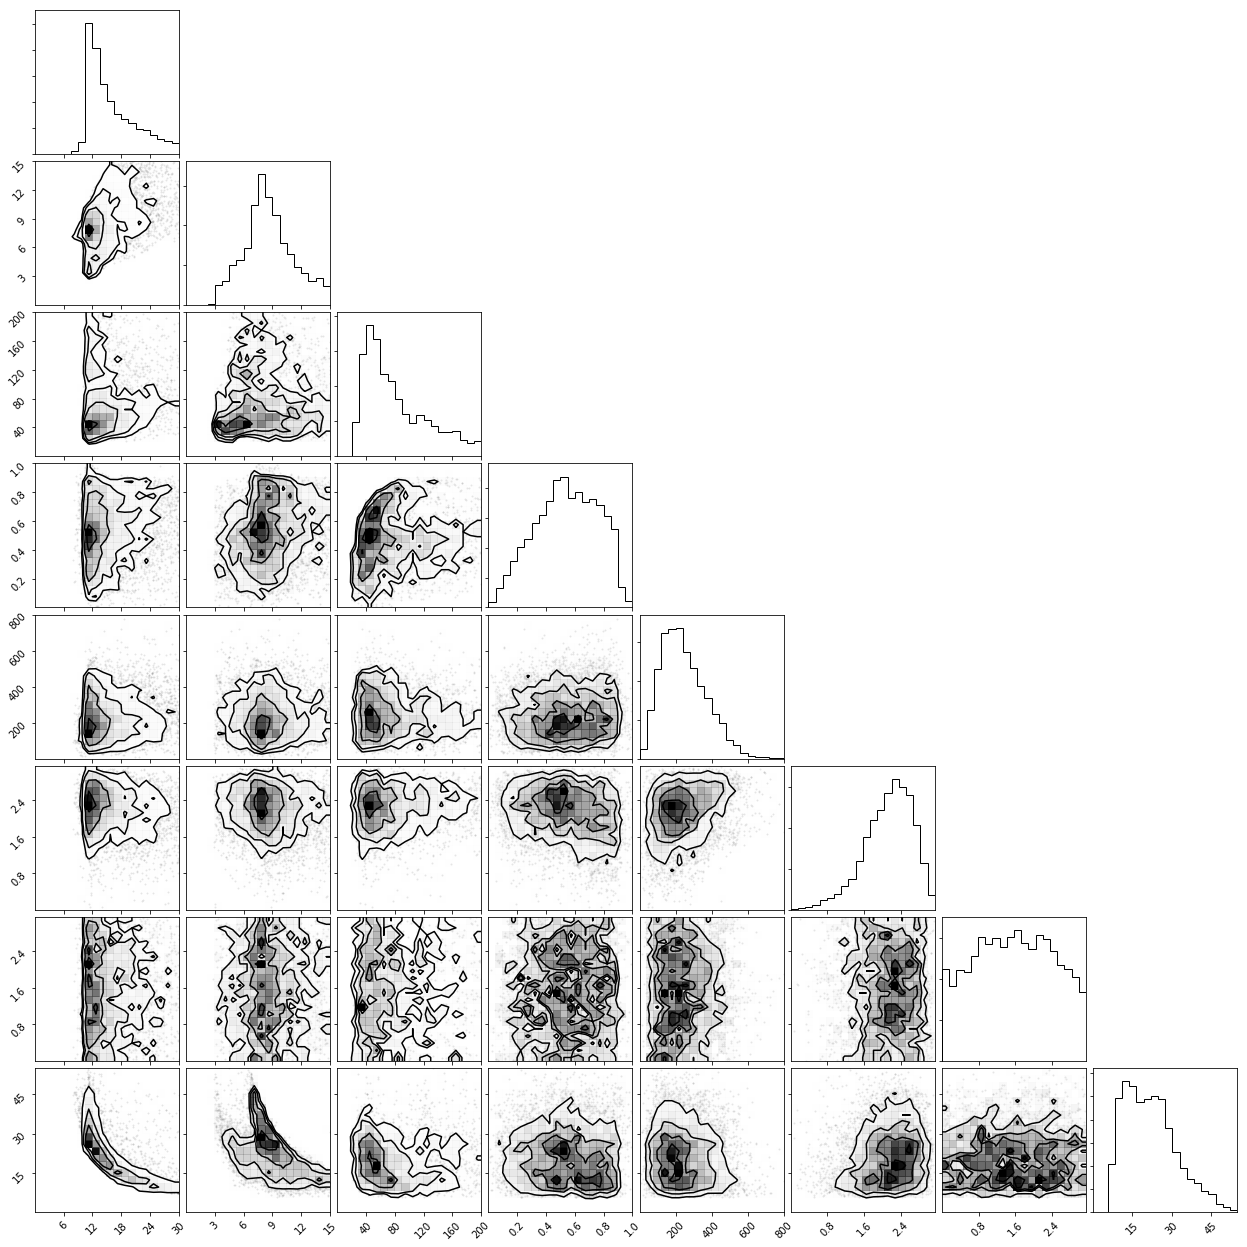

In [53]:
idx = [0, 1, 2, 3, 4, 5, 6, 9]

data_forward_small = np.take(data_forward, idx, axis=1)


plt_range = ([0,30], [0,15], [0,200], [0,1], [0,800], [0,np.pi], [0,np.pi], [0, 55.0])
corner.corner(data_forward_small, range=plt_range)
plt.show()

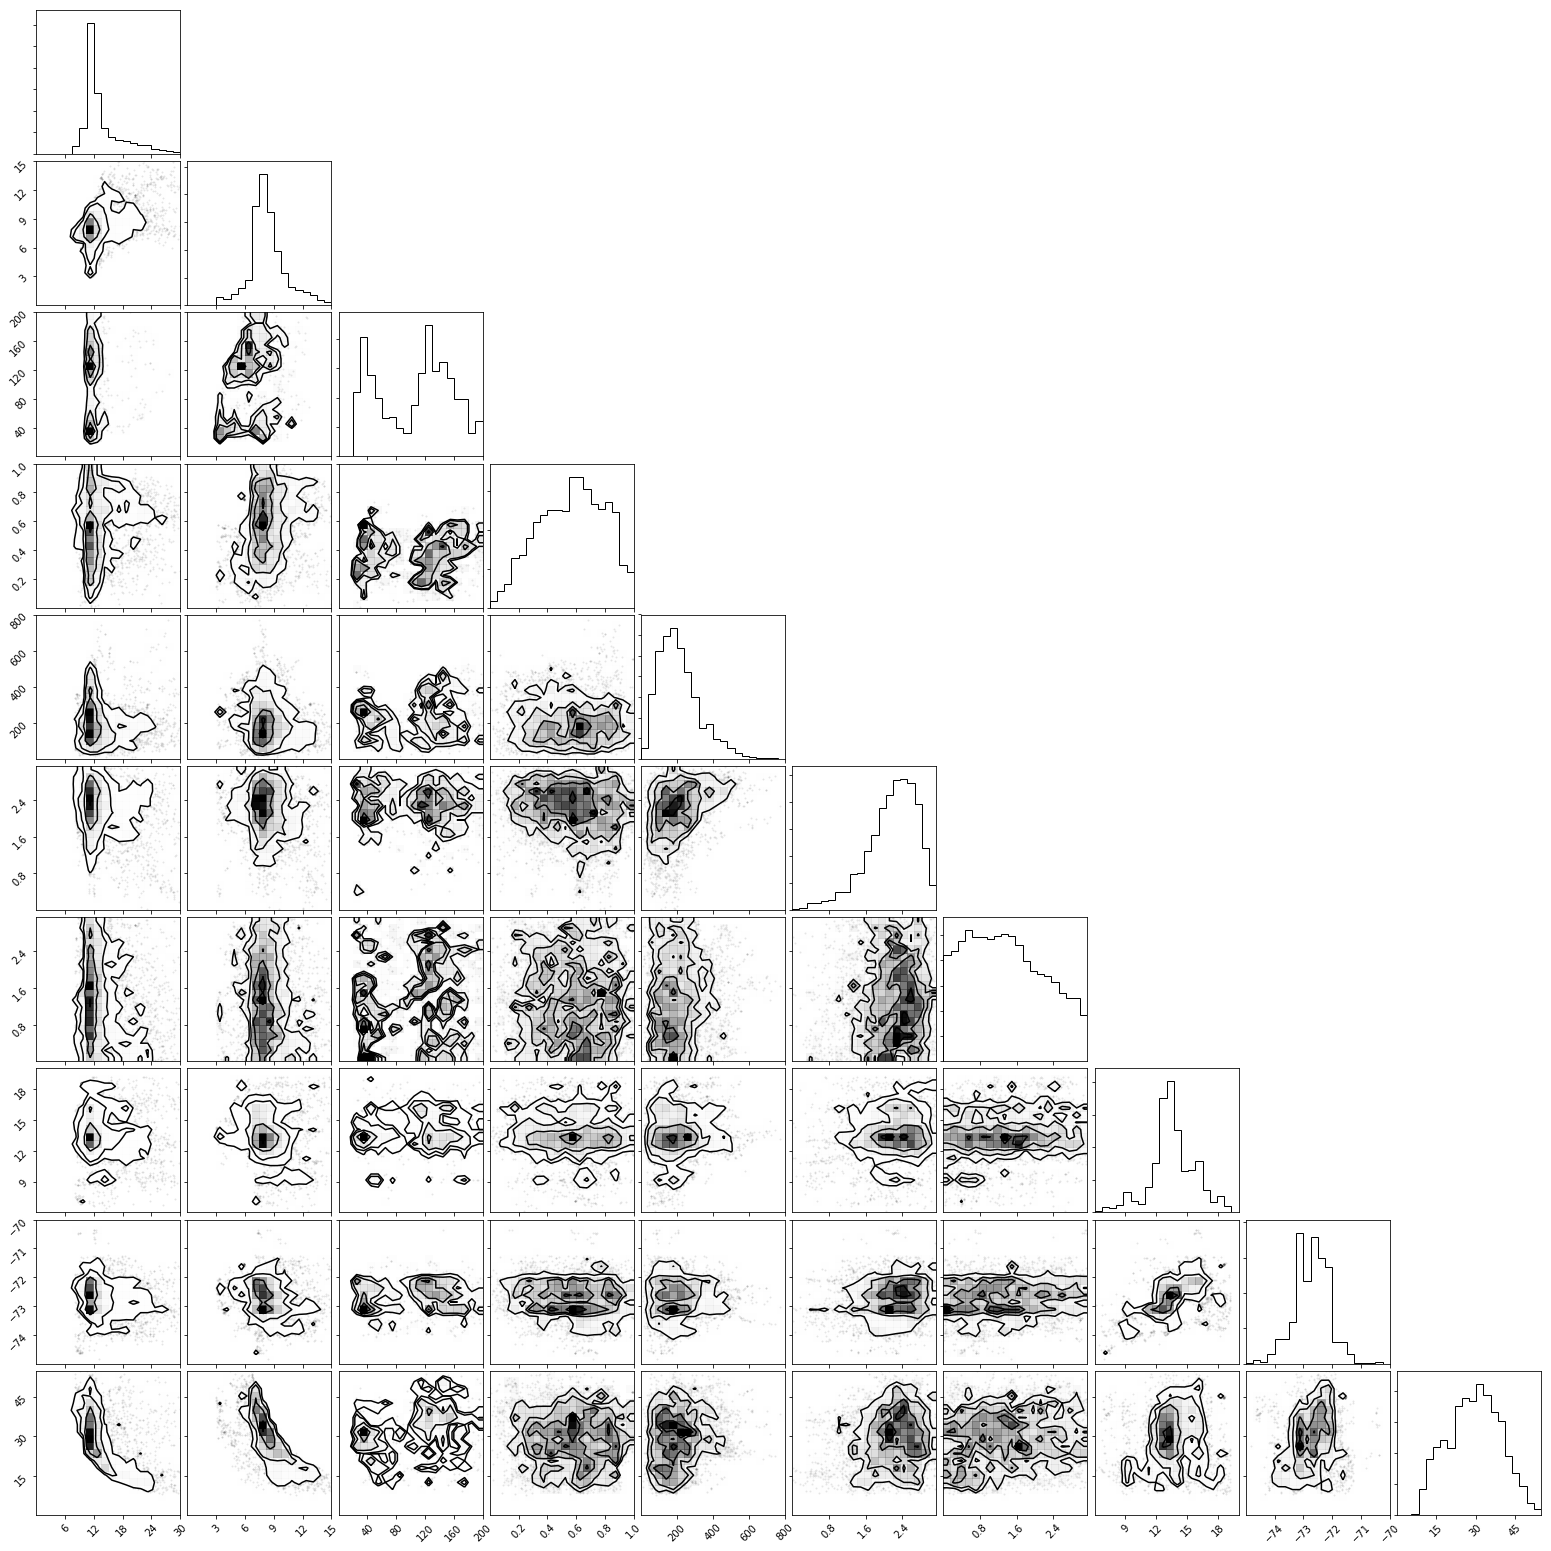

In [54]:
data_tmp = copy.copy(data_MCMC)

plt_range = ([0,30], [0,15], [0,200], [0,1], [0,800], [0,np.pi], [0,np.pi], [6,20], [-75,-70], [0, 55.0])
corner.corner(data_tmp, range=plt_range)

plt.show()

### Check to make sure the prior distributions match

In [55]:
prior_chains = np.load("../data/prior_chains.npy")
prior_chains = prior_chains.reshape(800000, 8)
prior_chains = prior_chains[0::10, :]

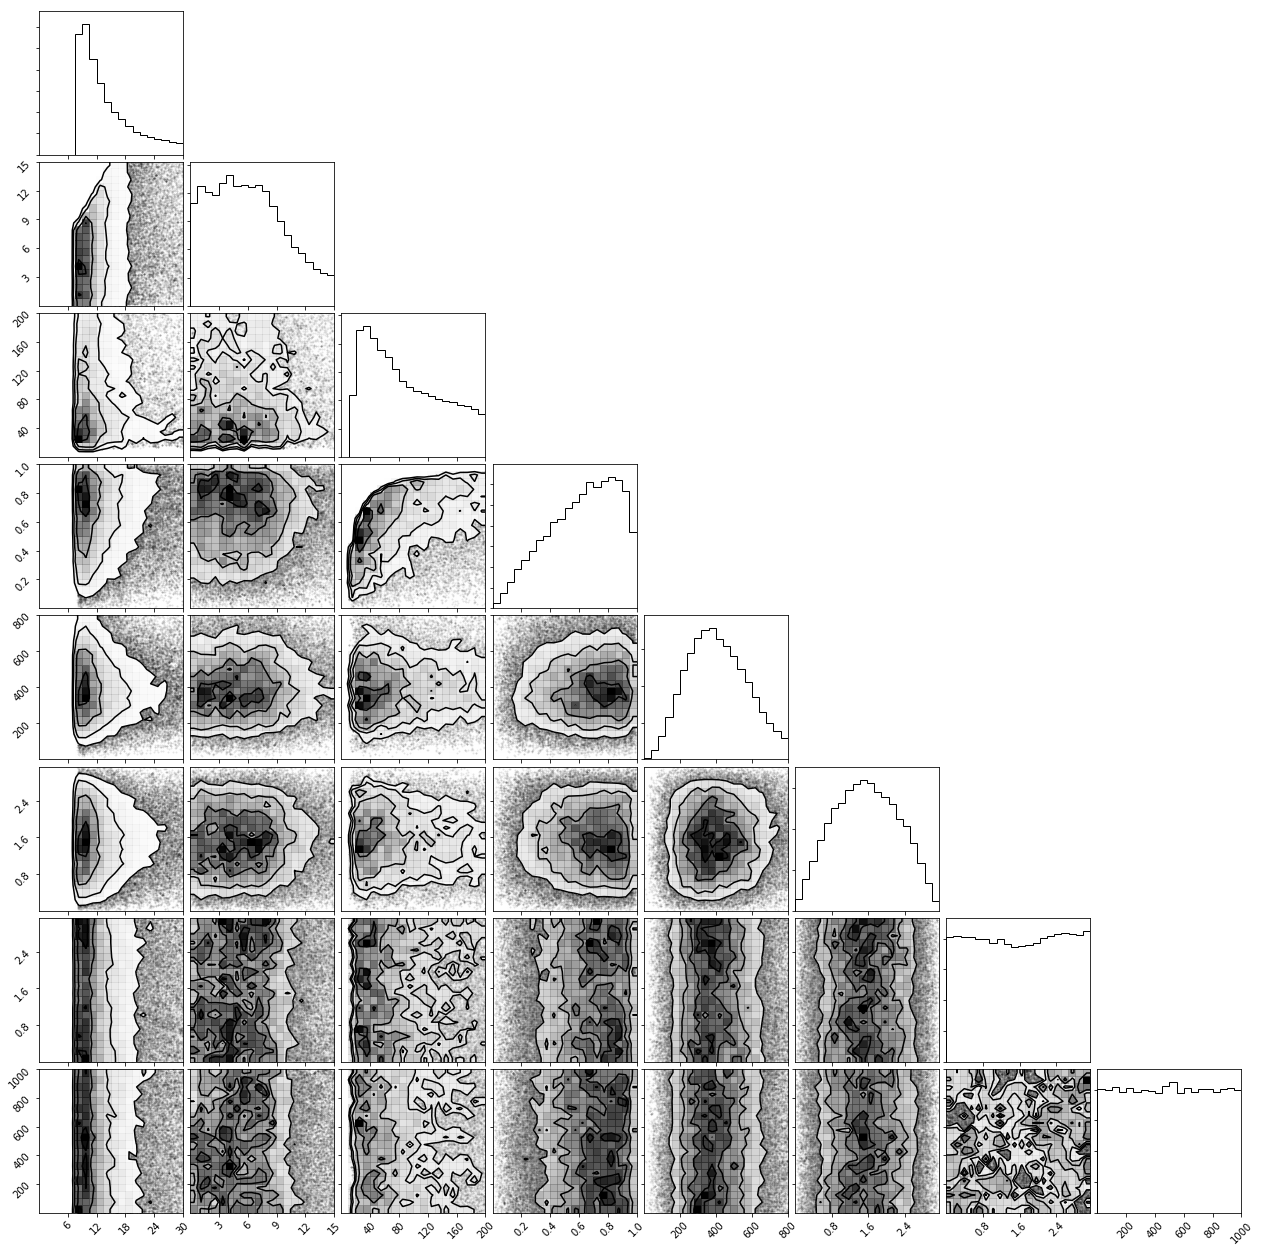

In [56]:
plt_range = ([0,30], [0,15], [0,200], [0,1], [0,800], [0,np.pi], [0,np.pi], [0, 1000.0])
corner.corner(prior_chains, range=plt_range)
plt.show()

In [12]:
from xrb.pop_synth import pop_synth

In [13]:
pop = pop_synth.generate_population(80000)

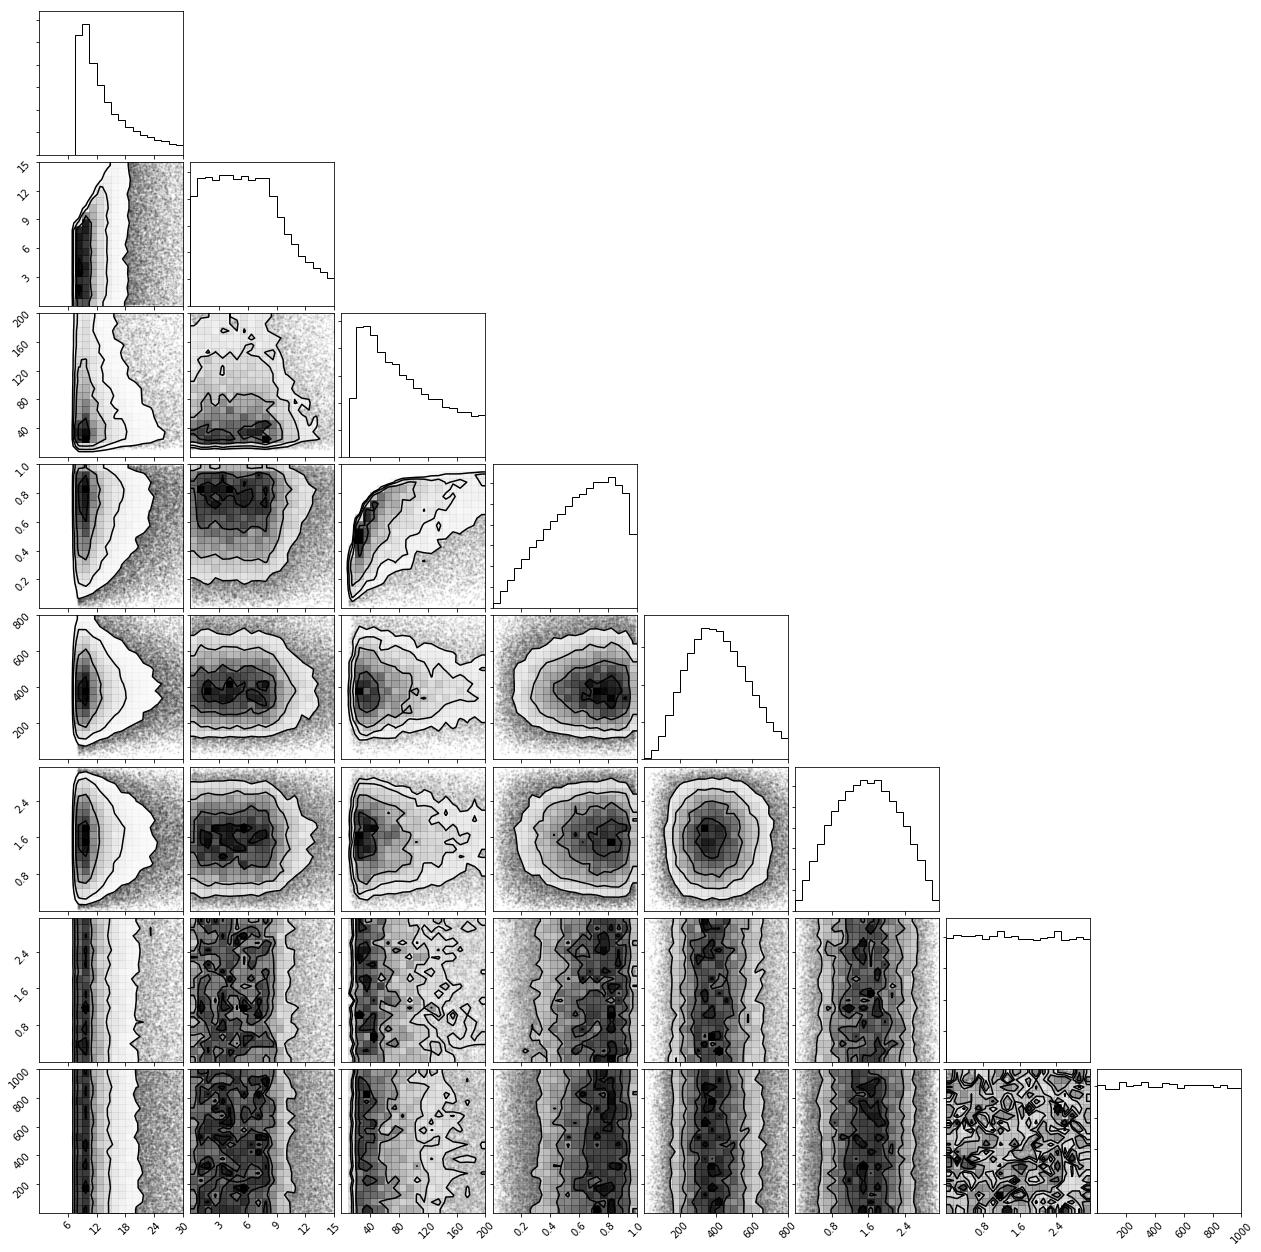

In [15]:
M1, M2, A, ecc, v_k, theta, phi = pop

prior_forward = np.array([M1, M2, A, ecc, v_k, theta, phi, 1000.0*np.random.uniform(size=80000)])

corner.corner(prior_forward.T, range=plt_range)

plt.show()